In [2]:
import numpy as np
# labirent matrisi
labirent =  np.array([
    [-100, -100, -100, -100, -100, 100, -100, -100, -100, -100],
    [-100, -1, -1, -100, -1, -1, -1, -1, -1, -100],
    [-100, -1, -100, -100, -100, -1, -100, -100, -1, -100],
    [-100, -1, -1, -1, -100, -1, -1, -100, -1, -1],
    [-100, -100, -100, -1, -100, -1, -100, -1, -100, -1],
    [-100, -1, -1, -1, -1, -1, -100, -1, -100, -100],
    [-100, -100, -100, -100, -1, -100, -100, -1, -1, -1],
    [-100, -100, -1, -1, -1, -1, -1, -1, -100, -1],
    [-100, -1, -100, -1, -100, -1, -100, -1, -1, -1],
    [-100, -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [-100, -100, -100, -100, -100, -100, -100, -100, -100, -100]
])
print("Labirent",labirent)

labirent_satir_sayisi, labirent_sutun_sayisi = labirent.shape
q_degerleri = np.zeros((labirent_satir_sayisi, labirent_sutun_sayisi, 4))
hareketler = ['SAG', 'SOL', 'YUKARI', 'ASAGI']

def engel_mi(gecerli_satir_indeks, gecerli_sutun_indeks):
  if labirent[gecerli_satir_indeks, gecerli_sutun_indeks] == -1.:
    return False
  else:
    return True

def baslangic_belirle():
  gecerli_satir_indeks = np.random.randint(labirent_satir_sayisi)
  gecerli_sutun_indeks = np.random.randint(labirent_sutun_sayisi)
  while engel_mi(gecerli_satir_indeks, gecerli_sutun_indeks):
    gecerli_satir_indeks = np.random.randint(labirent_satir_sayisi)
    gecerli_sutun_indeks = np.random.randint(labirent_sutun_sayisi)
  return gecerli_satir_indeks, gecerli_sutun_indeks

def hareket_belirle(gecerli_satir_indeks, gecerli_sutun_indeks, epsilon):
  if np.random.random() < epsilon:
    return np.argmax(q_degerleri[gecerli_satir_indeks, gecerli_sutun_indeks])
  else: 
    return np.random.randint(4)

def hareket_et(gecerli_satir_indeks, gecerli_sutun_indeks, hareket_indeks):
  yeni_satir_indeks = gecerli_satir_indeks
  yeni_sutun_indeks = gecerli_sutun_indeks

  if hareketler[hareket_indeks] == 'SAG' and gecerli_sutun_indeks < labirent_sutun_sayisi - 1:
    yeni_sutun_indeks += 1
  elif hareketler[hareket_indeks] == 'SOL' and gecerli_sutun_indeks > 0:
    yeni_sutun_indeks -= 1
  elif hareketler[hareket_indeks] == 'YUKARI' and gecerli_satir_indeks > 0:
    yeni_satir_indeks -= 1
  elif hareketler[hareket_indeks] == 'ASAGI' and gecerli_satir_indeks < labirent_satir_sayisi - 1:
    yeni_satir_indeks += 1
  return yeni_satir_indeks, yeni_sutun_indeks

def en_kisa_yol(bas_satir_indeks, bas_sutun_indeks):
  if engel_mi(bas_satir_indeks, bas_sutun_indeks):
    return []
  else:
    gecerli_satir_indeks, gecerli_sutun_indeks = bas_satir_indeks, bas_sutun_indeks
    en_kisa = []
    en_kisa.append([gecerli_satir_indeks, gecerli_sutun_indeks])
    while not engel_mi(gecerli_satir_indeks, gecerli_sutun_indeks):
      hareket_indeks = hareket_belirle(gecerli_satir_indeks, gecerli_sutun_indeks, 1.)
      gecerli_satir_indeks, gecerli_sutun_indeks = hareket_et(gecerli_satir_indeks, 
                                                                       gecerli_sutun_indeks, hareket_indeks)
      en_kisa.append([gecerli_satir_indeks, gecerli_sutun_indeks])
    return en_kisa

epsilon = 0.9
azalma_degeri = 0.9 
ogrenme_orani = 0.9 

for adim in range(1000):
  satir_indeks, sutun_indeks = baslangic_belirle()
  while not engel_mi(satir_indeks, sutun_indeks):
    hareket_indeks = hareket_belirle(satir_indeks, sutun_indeks, epsilon)
    eski_satir_indeks, eski_sutun_indeks = satir_indeks, sutun_indeks
    satir_indeks, sutun_indeks = hareket_et(satir_indeks, sutun_indeks, hareket_indeks)
    odul = labirent[satir_indeks, sutun_indeks]
    eski_q_degeri = q_degerleri[eski_satir_indeks, eski_sutun_indeks, hareket_indeks]
    fark = odul + (azalma_degeri * np.max(q_degerleri[satir_indeks, sutun_indeks])) - eski_q_degeri
    yeni_q_degeri = eski_q_degeri + (ogrenme_orani * fark)
    q_degerleri[eski_satir_indeks, eski_sutun_indeks, hareket_indeks] = yeni_q_degeri
print('Eğitim tamamlandı.')

baslangic_satir, baslangic_sutun = input('Robotun başlangıç konumunu giriniz: (Örnek: 0 0)\n').split()
baslangic_satir = int(baslangic_satir)
baslangic_sutun = int(baslangic_sutun)
en_kisa_rota = en_kisa_yol(int(baslangic_satir), int(baslangic_sutun))
if not en_kisa_rota:
    print('Girdiğiniz konum geçersiz. Lütfen geçerli bir konum giriniz.')
else:
    print('Çıkışa giden rota:')
    for i in range(len(en_kisa_rota)):
        print(en_kisa_rota[i])


Labirent [[-100 -100 -100 -100 -100  100 -100 -100 -100 -100]
 [-100   -1   -1 -100   -1   -1   -1   -1   -1 -100]
 [-100   -1 -100 -100 -100   -1 -100 -100   -1 -100]
 [-100   -1   -1   -1 -100   -1   -1 -100   -1   -1]
 [-100 -100 -100   -1 -100   -1 -100   -1 -100   -1]
 [-100   -1   -1   -1   -1   -1 -100   -1 -100 -100]
 [-100 -100 -100 -100   -1 -100 -100   -1   -1   -1]
 [-100 -100   -1   -1   -1   -1   -1   -1 -100   -1]
 [-100   -1 -100   -1 -100   -1 -100   -1   -1   -1]
 [-100   -1   -1   -1   -1   -1   -1   -1   -1   -1]
 [-100 -100 -100 -100 -100 -100 -100 -100 -100 -100]]
Eğitim tamamlandı.
Çıkışa giden rota:
[1, 1]
[2, 1]
[3, 1]
[3, 2]
[3, 3]
[4, 3]
[5, 3]
[5, 4]
[5, 5]
[4, 5]
[3, 5]
[2, 5]
[1, 5]
[0, 5]


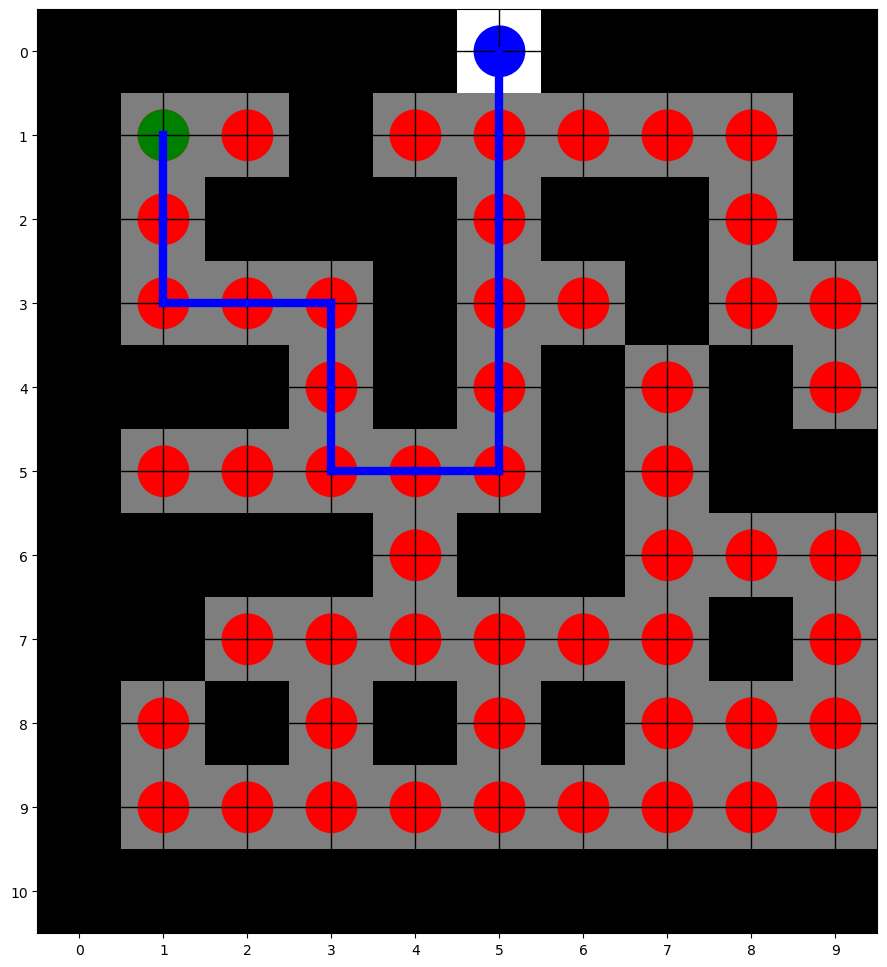

In [3]:
# Labirenti ve yolu görselleştir
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(labirent, cmap='gray')
ax.set_xticks(range(labirent_sutun_sayisi))
ax.set_yticks(range(labirent_satir_sayisi))
ax.grid(color='k', linestyle='-', linewidth=1)

# Engelleri ve hedefi ekle
for satir in range(labirent_satir_sayisi):
    for sutun in range(labirent_sutun_sayisi):
        if labirent[satir, sutun] == -1:
            ax.add_artist(plt.Circle((sutun, satir), 0.3, color='r'))
        elif labirent[satir, sutun] == 100:
            ax.add_artist(plt.Circle((sutun, satir), 0.3, color='b'))

# Başlangıç noktasını ekle
# Başlangıç noktasını ekle
ax.add_artist(plt.Circle((baslangic_sutun, baslangic_satir), 0.3, color='g'))
for i in range(len(en_kisa_rota) - 1):
    ax.plot([en_kisa_rota[i][1], en_kisa_rota[i+1][1]], [en_kisa_rota[i][0], en_kisa_rota[i+1][0]], color='b', linewidth=6)

plt.show()
